<a href="https://www.kaggle.com/code/chaitanyaugale/big-data-derby?scriptVersionId=108194878" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


In [2]:
nyra_track = pd.read_csv('../input/big-data-derby-2022/nyra_tracking_table.csv')
nyra_start = pd.read_csv('../input/big-data-derby-2022/nyra_start_table.csv')
nyra_race = pd.read_csv('../input/big-data-derby-2022/nyra_race_table.csv')
nyra_complete = pd.read_csv('../input/big-data-derby-2022/nyra_2019_complete.csv')

In [3]:
print('Count of Track Table : ',nyra_track.shape)
print('Count of Start Table : ',nyra_start.shape)
print('Count of Race Table : ',nyra_race.shape)
print('Count of Complete Race Table : ',nyra_complete.shape)

Count of Track Table :  (5228430, 7)
Count of Start Table :  (14914, 8)
Count of Race Table :  (2000, 10)
Count of Complete Race Table :  (5228429, 18)


In [4]:
nyra_track.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762


In [5]:
nyra_race.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [6]:
nyra_start.head()

,AQU,2019-01-01,1,1,123,Dylan Davis,130,2
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2


In [7]:
nyra_complete.head()

,AQU,2019-01-01,9,6,72,40.6729017197787,-73.8276065972899,600,D,GD,48,CLM,25000.00,00420,120,Andre Shivnarine Worrie,2090,8
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [8]:
# no column name is added on start and complete table
#adding column name for both tables

In [9]:
start_columns = ['track_id',
                 'race_date',
'race_number',
'program_number',
'weight_carried',
'jockey',
'odds',
'position_at_finish']

In [10]:
nyra_start.columns = start_columns

In [11]:
nyra_start.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,1,2,120,Junior Alvarado,295,3
1,AQU,2019-01-01,1,3,118,Jose Lezcano,180,4
2,AQU,2019-01-01,1,4,123,Jomar Garcia,1280,5
3,AQU,2019-01-01,1,5,118,Manuel Franco,1150,1
4,AQU,2019-01-01,2,1,121,Jose Lezcano,220,2


In [12]:
complete_columns = ['track_id',
                 'race_date',
'race_number',
'program_number',
'trakus_index','latitude','longitude','distance_id','course_type','track_condition','run_up_distance','race_type','purse','post_time',
'weight_carried',
'jockey',
'odds',
'position_at_finish']

In [13]:
nyra_complete.columns= complete_columns

In [14]:
nyra_complete.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8


In [15]:
nyra_complete.isnull().sum()

track_id              0
race_date             0
race_number           0
program_number        0
trakus_index          0
latitude              0
longitude             0
distance_id           0
course_type           0
track_condition       0
run_up_distance       0
race_type             0
purse                 0
post_time             0
weight_carried        0
jockey                0
odds                  0
position_at_finish    0
dtype: int64

In [16]:
nyra_complete.nunique()

track_id                    3
race_date                 217
race_number                13
program_number             36
trakus_index             1062
latitude              5224783
longitude             5224798
distance_id                20
course_type                 5
track_condition             7
run_up_distance           127
race_type                  12
purse                      70
post_time                 360
weight_carried             35
jockey                    178
odds                      656
position_at_finish         14
dtype: int64

In [17]:
nyra_complete.describe(include='all')

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
count,5228429,5228429,5.228429e+06,5228429,5.228429e+06,5.228429e+06,5.228429e+06,5.228429e+06,5228429,5228429,5.228429e+06,5228429,5.228429e+06,5.228429e+06,5.228429e+06,5228429,5.228429e+06,5.228429e+06
unique,3,217,NaN,36,NaN,NaN,NaN,NaN,5,7,NaN,12,NaN,NaN,NaN,178,NaN,NaN
top,AQU,2019-08-24,NaN,3,NaN,NaN,NaN,NaN,D,FT,NaN,CLM,NaN,NaN,NaN,Manuel Franco,NaN,NaN
freq,2158368,43925,NaN,384399,NaN,NaN,NaN,NaN,3229233,2345748,NaN,1142800,NaN,NaN,NaN,444024,NaN,NaN
mean,NaN,NaN,5.505408e+00,NaN,1.838652e+02,4.120387e+01,-7.377702e+01,7.563152e+02,NaN,NaN,6.791919e+01,NaN,8.887892e+04,4.204248e+02,1.207133e+02,NaN,1.482920e+03,4.481434e+00
std,NaN,NaN,2.860655e+00,NaN,1.183327e+02,9.771227e-01,4.711054e-02,1.796887e+02,NaN,NaN,3.892271e+01,NaN,1.278240e+05,2.802545e+02,4.351881e+00,NaN,1.952415e+03,2.568150e+00
min,NaN,NaN,1.000000e+00,NaN,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,NaN,NaN,0.000000e+00,NaN,1.600000e+04,1.000000e+02,1.100000e+02,NaN,0.000000e+00,1.000000e+00
25%,NaN,NaN,3.000000e+00,NaN,8.800000e+01,4.067346e+01,-7.382883e+01,6.000000e+02,NaN,NaN,4.500000e+01,NaN,4.100000e+04,2.330000e+02,1.180000e+02,NaN,3.350000e+02,2.000000e+00
50%,NaN,NaN,6.000000e+00,NaN,1.760000e+02,4.071393e+01,-7.376915e+01,8.000000e+02,NaN,NaN,5.400000e+01,NaN,6.200000e+04,3.490000e+02,1.200000e+02,NaN,7.300000e+02,4.000000e+00
75%,NaN,NaN,8.000000e+00,NaN,2.640000e+02,4.071739e+01,-7.372564e+01,8.500000e+02,NaN,NaN,8.000000e+01,NaN,8.000000e+04,5.160000e+02,1.220000e+02,NaN,1.740000e+03,6.000000e+00


In [18]:
pd.options.display.float_format = '{:.2f}'.format

nyra_complete.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,73,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,74,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,63,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,64,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,65,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8


In [19]:
nyra_complete.describe(include='all')

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
count,5228429,5228429,5228429.00,5228429,5228429.00,5228429.00,5228429.00,5228429.00,5228429,5228429,5228429.00,5228429,5228429.00,5228429.00,5228429.00,5228429,5228429.00,5228429.00
unique,3,217,NaN,36,NaN,NaN,NaN,NaN,5,7,NaN,12,NaN,NaN,NaN,178,NaN,NaN
top,AQU,2019-08-24,NaN,3,NaN,NaN,NaN,NaN,D,FT,NaN,CLM,NaN,NaN,NaN,Manuel Franco,NaN,NaN
freq,2158368,43925,NaN,384399,NaN,NaN,NaN,NaN,3229233,2345748,NaN,1142800,NaN,NaN,NaN,444024,NaN,NaN
mean,NaN,NaN,5.51,NaN,183.87,41.20,-73.78,756.32,NaN,NaN,67.92,NaN,88878.92,420.42,120.71,NaN,1482.92,4.48
std,NaN,NaN,2.86,NaN,118.33,0.98,0.05,179.69,NaN,NaN,38.92,NaN,127824.03,280.25,4.35,NaN,1952.42,2.57
min,NaN,NaN,1.00,NaN,1.00,40.67,-73.83,450.00,NaN,NaN,0.00,NaN,16000.00,100.00,110.00,NaN,0.00,1.00
25%,NaN,NaN,3.00,NaN,88.00,40.67,-73.83,600.00,NaN,NaN,45.00,NaN,41000.00,233.00,118.00,NaN,335.00,2.00
50%,NaN,NaN,6.00,NaN,176.00,40.71,-73.77,800.00,NaN,NaN,54.00,NaN,62000.00,349.00,120.00,NaN,730.00,4.00
75%,NaN,NaN,8.00,NaN,264.00,40.72,-73.73,850.00,NaN,NaN,80.00,NaN,80000.00,516.00,122.00,NaN,1740.00,6.00


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='weight_carried'>

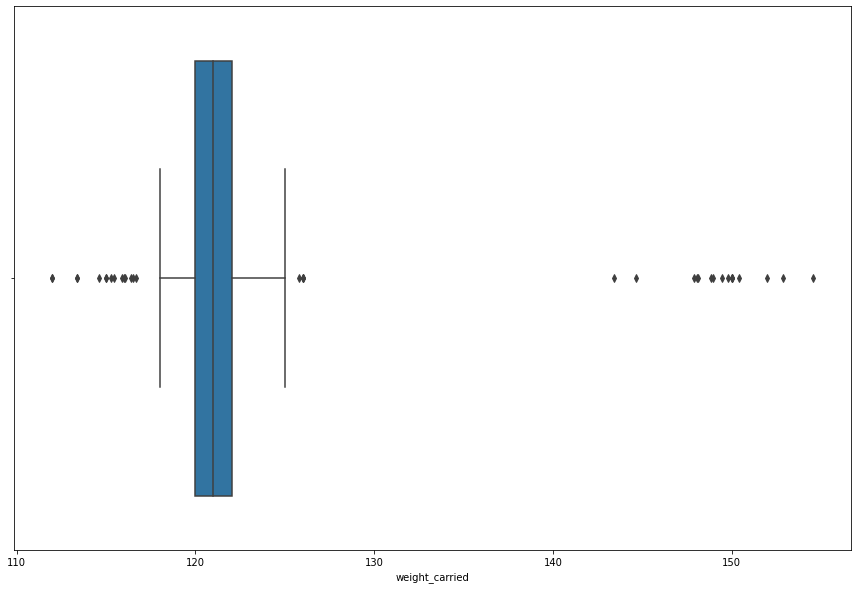

In [21]:
plt.figure(figsize=(15,10))

sns.boxplot(nyra_complete.groupby("jockey").weight_carried.mean())

In [22]:
weight_carried_kg = (nyra_complete.weight_carried)*.45

In [23]:
nyra_complete['weight_carried_kg'] = weight_carried_kg

In [24]:
nyra_complete.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,weight_carried_kg
0,AQU,2019-01-01,9,6,73,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8,54.00
1,AQU,2019-01-01,9,6,74,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8,54.00
2,AQU,2019-01-01,9,6,63,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8,54.00
3,AQU,2019-01-01,9,6,64,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8,54.00
4,AQU,2019-01-01,9,6,65,40.67,-73.83,600,D,GD,48,CLM,25000.00,420,120,Andre Shivnarine Worrie,2090,8,54.00


<AxesSubplot:xlabel='weight_carried_kg'>

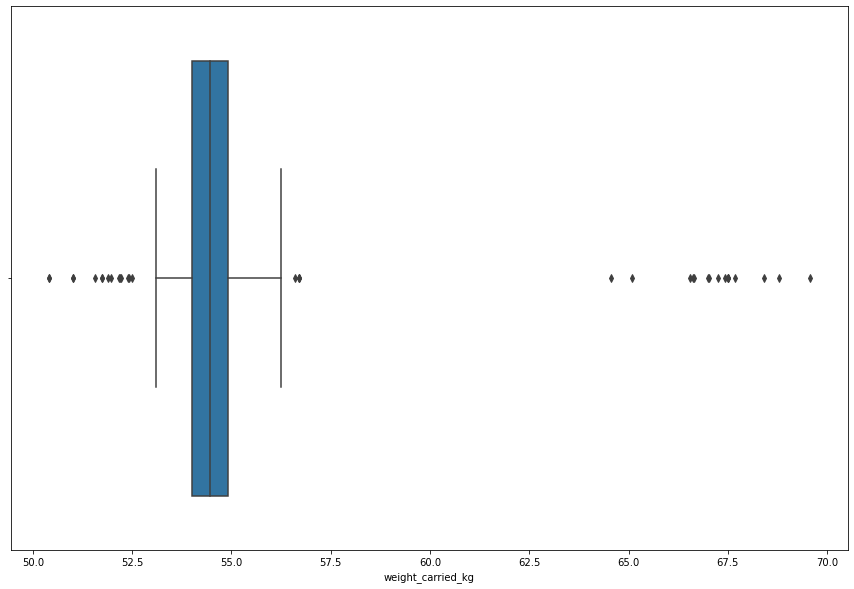

In [25]:
plt.figure(figsize=(15,10))

sns.boxplot(nyra_complete.groupby("jockey").weight_carried_kg.mean())

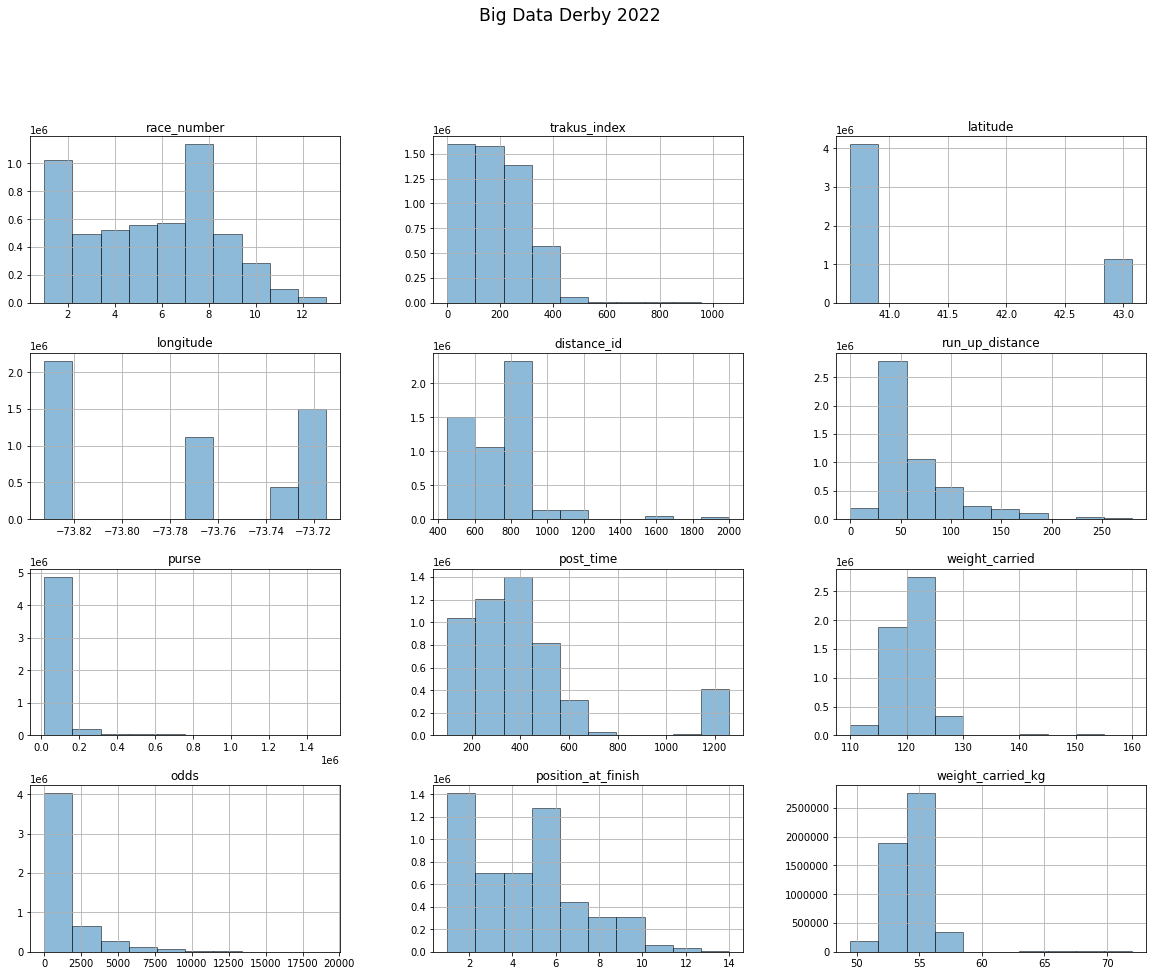

In [26]:
nyra_complete.hist(alpha=.5, rwidth=1, ec='black', figsize=(20,15));
plt.suptitle('Big Data Derby 2022', x=0.5, y=1, fontsize='xx-large');
plt.ticklabel_format(style='plain', useOffset=True)